In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom
from scipy.stats import norm
import math

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv

--2024-03-24 12:36:21--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 13.224.9.103, 13.224.9.129, 13.224.9.181, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|13.224.9.103|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7279 (7.1K) [text/plain]
Saving to: ‘aerofit_treadmill.csv’

aerofit_treadmill.c 100%[===================>]   7.11K  --.-KB/s    in 0s      

2024-03-24 12:36:21 (1.32 GB/s) - ‘aerofit_treadmill.csv’ saved [7279/7279]



In [ ]:
df = pd.read_csv("aerofit_treadmill.csv")

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
df.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


#EDA

In [ ]:
df.shape

(180, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [ ]:
df["Product"].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

In [ ]:
df["Product"].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

#Outliers

<Axes: xlabel='Product', ylabel='Age'>

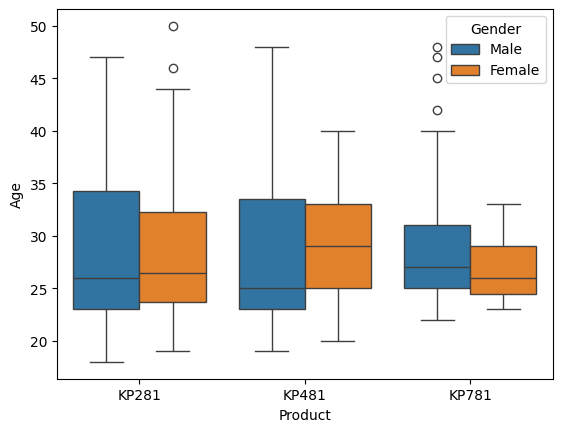

In [ ]:
sns.boxplot(df, y = "Age", x = "Product", hue = "Gender")

<Axes: xlabel='Product', ylabel='Education'>

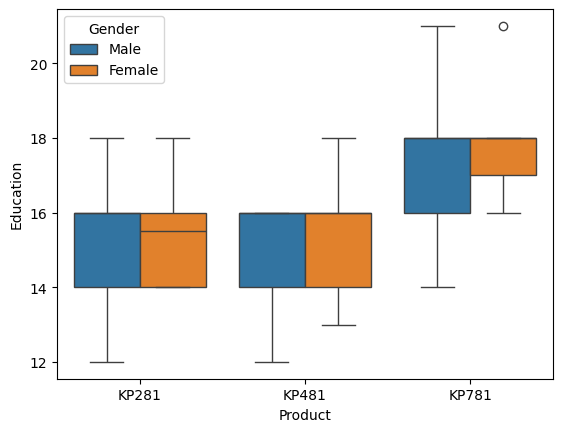

In [ ]:
sns.boxplot(df, y = "Education", x = "Product", hue = "Gender")

<Axes: xlabel='Product', ylabel='Income'>

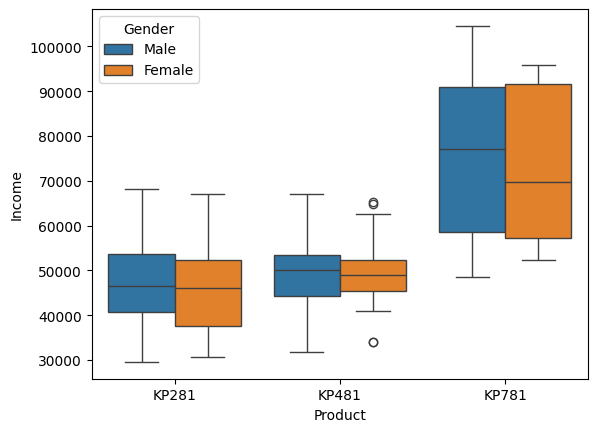

In [ ]:
sns.boxplot(df, y = "Income", x = "Product", hue = "Gender")

<Axes: xlabel='Product', ylabel='Miles'>

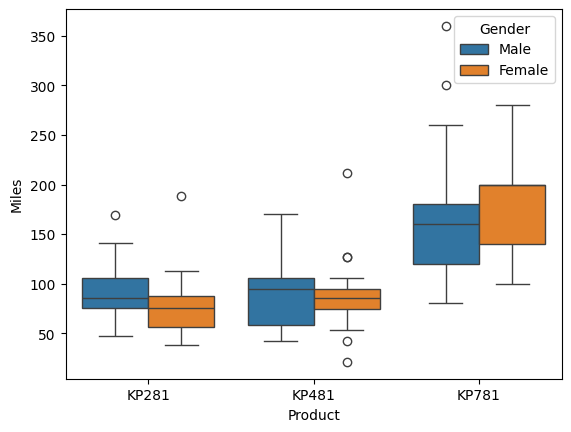

In [ ]:
sns.boxplot(df, y = "Miles", x = "Product", hue = "Gender")

#Effect on sales by 'Marital status', 'Gender' & 'Age'.

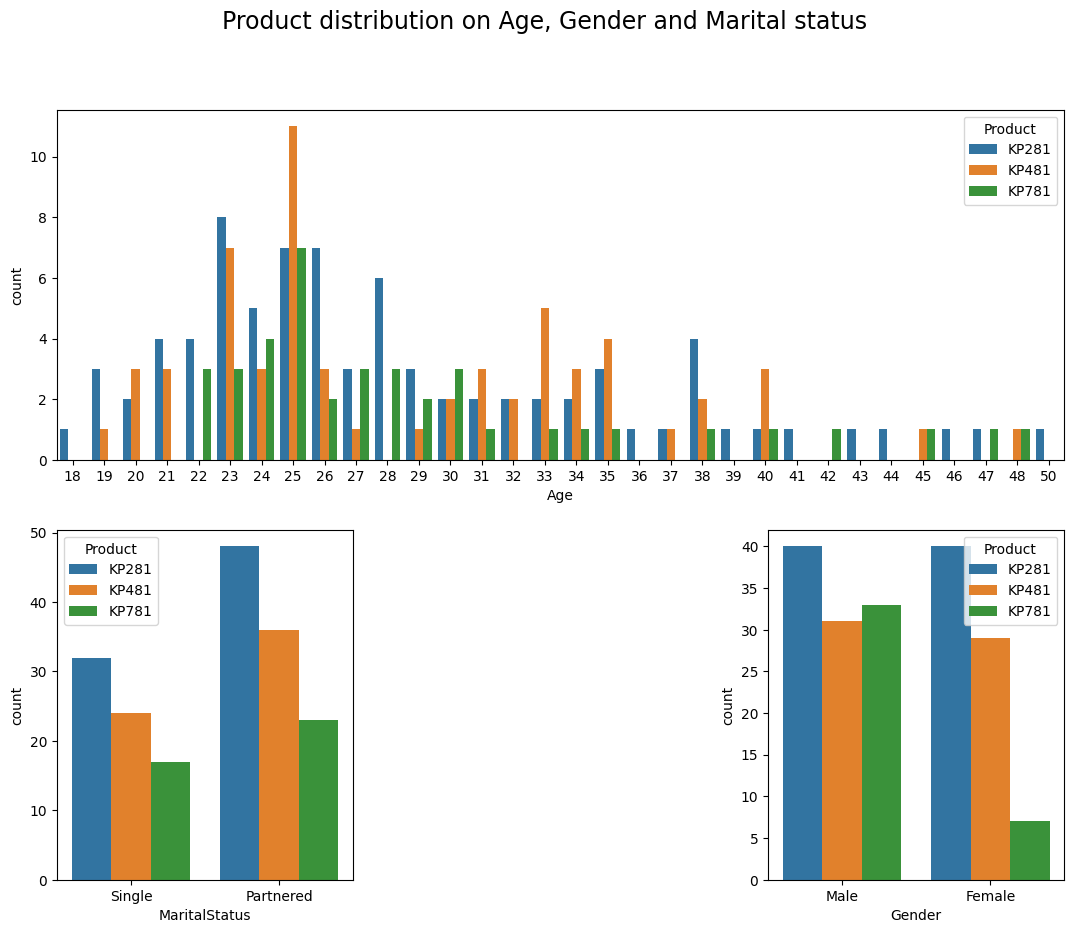

In [ ]:
plt.figure(figsize =(13,10))
plt.suptitle('Product distribution on Age, Gender and Marital status\n\n', fontsize=17)

plt.subplot(2, 3, 4)
sns.countplot(data=df, x='MaritalStatus', hue='Product')

plt.subplot(2, 3, 6)
sns.countplot(data=df, x='Gender', hue='Product')

plt.subplot(2, 1, 1)
sns.countplot(data=df, x='Age', hue='Product')

plt.show()

#Marginal Probability
###Overall sales distribution

In [ ]:
pd.crosstab(index = df["MaritalStatus"], columns = df["Product"], margins = True, normalize = True) #Marital status wise sales ditribution

Product,KP281,KP481,KP781,All
MaritalStatus,,,,
Partnered,0.266667,0.200000,0.127778,0.594444
Single,0.177778,0.133333,0.094444,0.405556
All,0.444444,0.333333,0.222222,1.000000


In [ ]:
pd.crosstab(index = df["Age"], columns = df["Product"], margins = True) #Age wise sales ditribution

Product,KP281,KP481,KP781,All
Age,,,,
18,1,0,0,1
19,3,1,0,4
20,2,3,0,5
21,4,3,0,7
22,4,0,3,7
23,8,7,3,18
24,5,3,4,12
25,7,11,7,25
26,7,3,2,12


In [ ]:
pd.crosstab(index = df["Gender"], columns = df["Product"], margins = True, normalize = True) #Gender wise sales distribution

Product,KP281,KP481,KP781,All
Gender,,,,
Female,0.222222,0.161111,0.038889,0.422222
Male,0.222222,0.172222,0.183333,0.577778
All,0.444444,0.333333,0.222222,1.000000


In [ ]:
pd.crosstab(index = df["Education"], columns = df["Product"], margins = True) #Education wise sales distribution

Product,KP281,KP481,KP781,All
Education,,,,
12,2,1,0,3
13,3,2,0,5
14,30,23,2,55
15,4,1,0,5
16,39,31,15,85
18,2,2,19,23
20,0,0,1,1
21,0,0,3,3
All,80,60,40,180


#Correlation

In [ ]:
df.corr()

<ipython-input-40-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


<ipython-input-55-005e38103c76>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True, cmap="flare")


<Axes: >

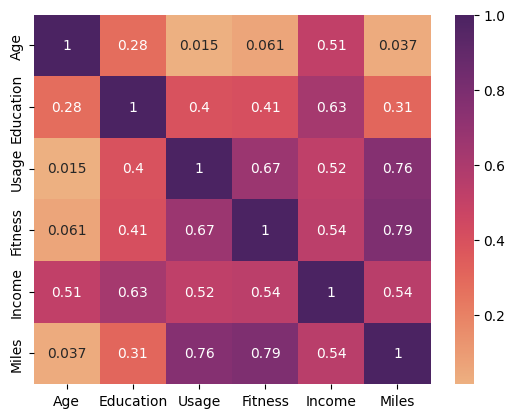

In [ ]:
sns.heatmap(df.corr(),annot=True, cmap="flare")

<Figure size 1800x700 with 0 Axes>

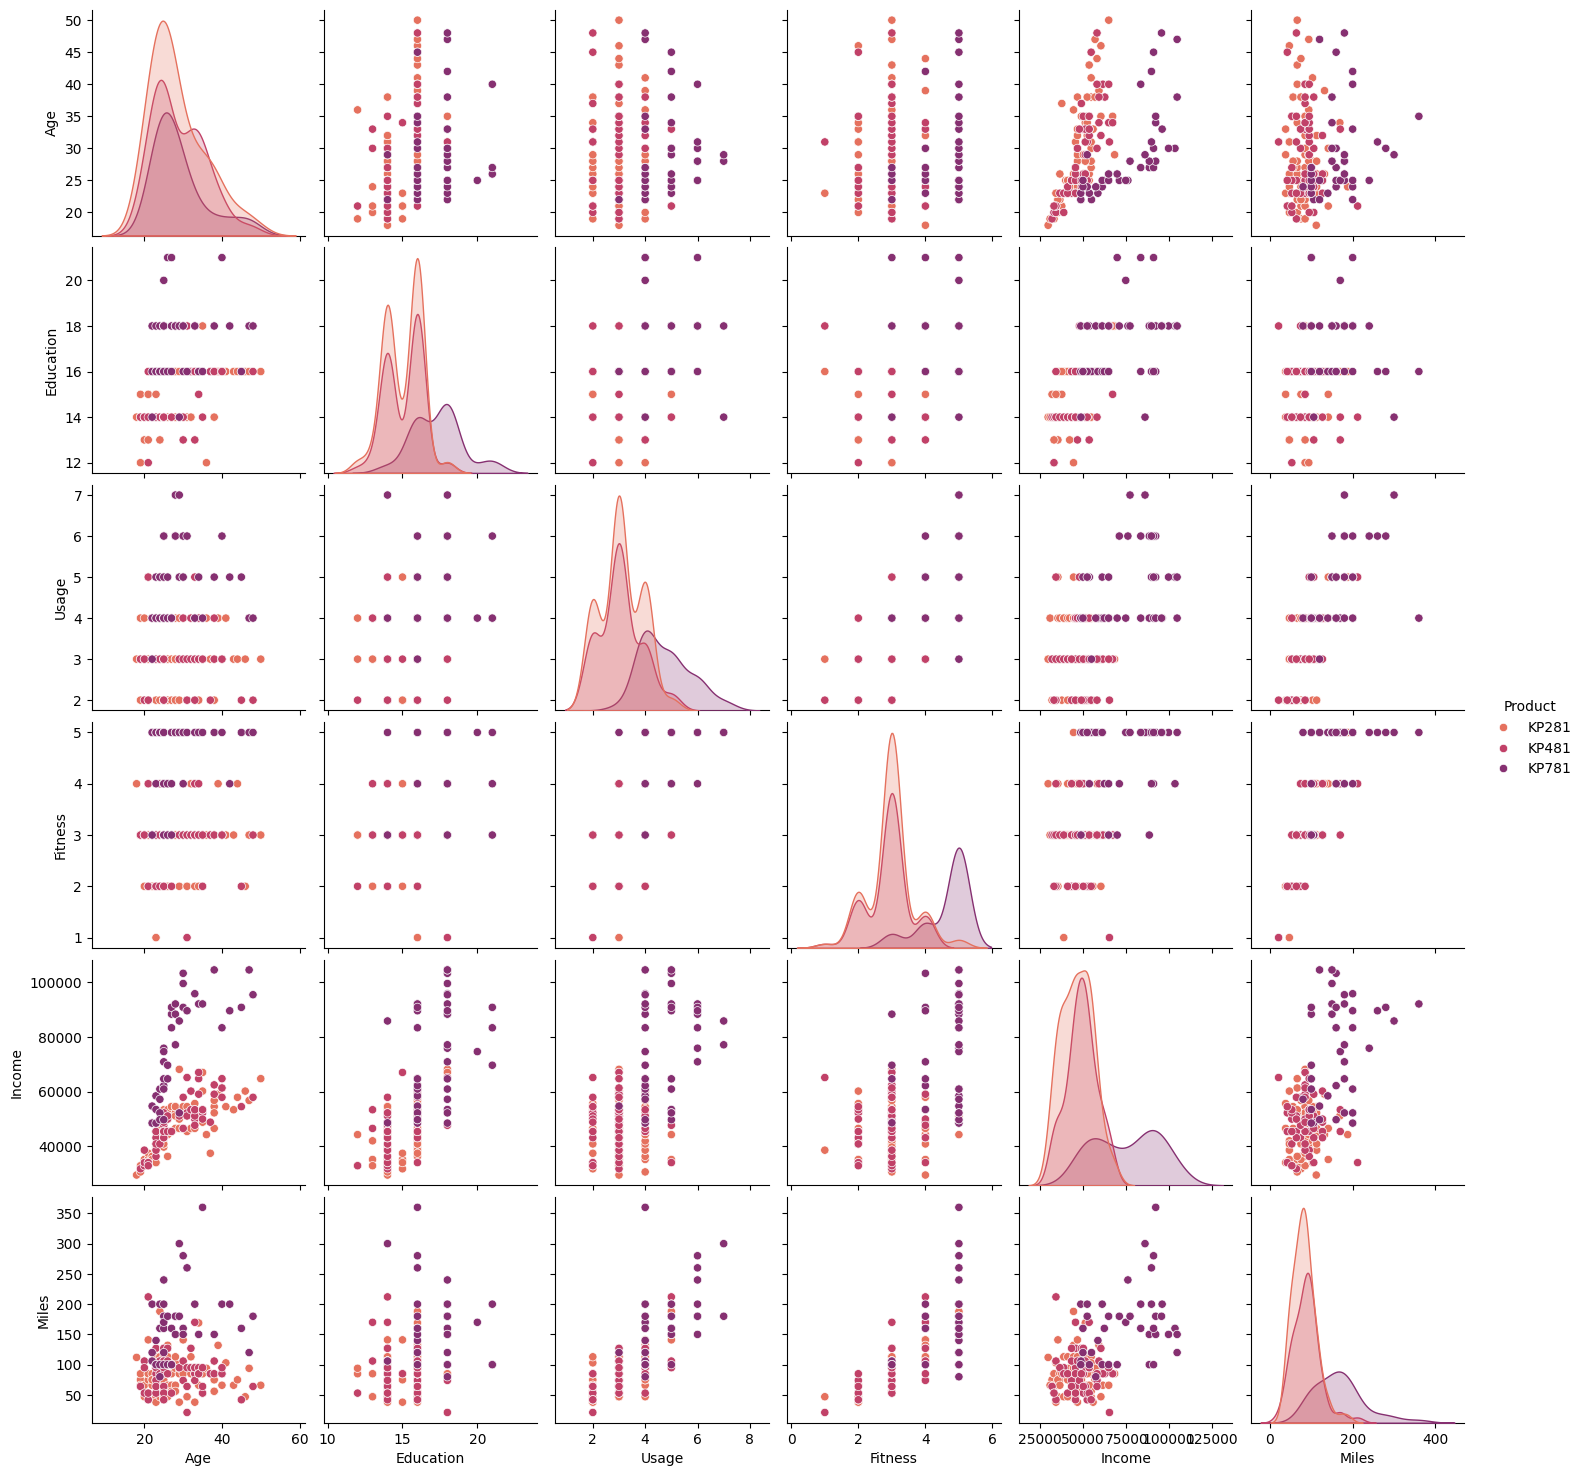

In [ ]:
plt.figure(figsize= (18,7))
sns.pairplot(df, palette='flare', hue='Product')
plt.show()

#Customer Profiling

###Income based profiling

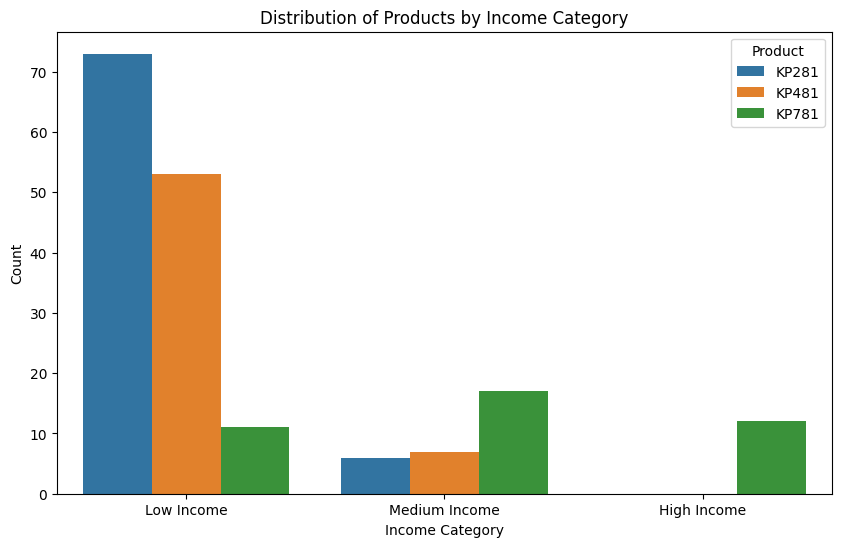

In [ ]:
bin = [30000, 60000, 90000, 120000]
bin_labels = ['Low Income', 'Medium Income', 'High Income']

df['Income_Category'] = pd.cut(df['Income'], bins= bin, labels= bin_labels)

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Income_Category', hue='Product')

plt.title('Distribution of Products by Income Category')
plt.xlabel('Income Category')
plt.ylabel('Count')

plt.show()

###Fitness based profiling

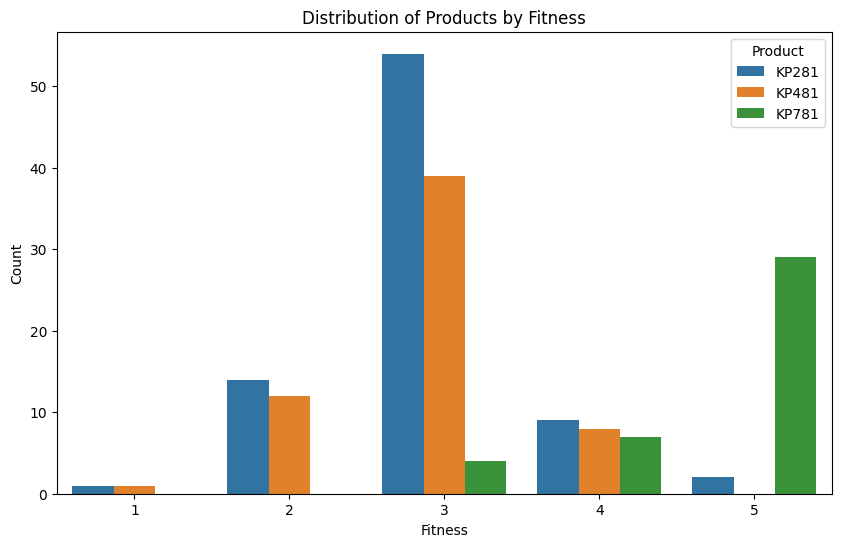

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Fitness', hue='Product')

plt.title('Distribution of Products by Fitness')
plt.xlabel('Fitness')
plt.ylabel('Count')

plt.show()

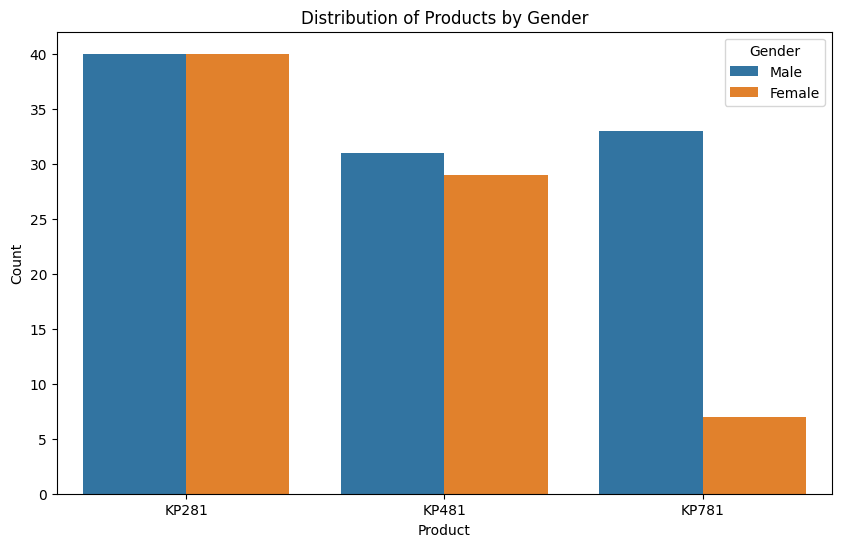

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Product', hue='Gender')

plt.title('Distribution of Products by Gender')
plt.xlabel('Product')
plt.ylabel('Count')

plt.show()

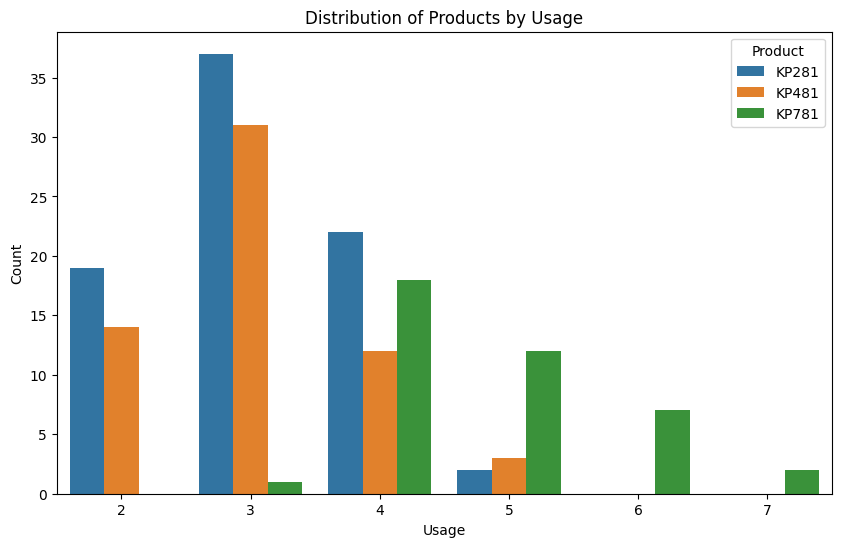

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Usage', hue='Product')

plt.title('Distribution of Products by Usage')
plt.xlabel('Usage')
plt.ylabel('Count')

plt.show()

#Insights

##KP281

- KP281 is the highest selling tredmill
- KP281 are popular equally within Male and Female buyers
- KP281 are preferred mostly by buyers with education less than 17 years
- KP281 buyers are most serious about fitness.
- KP281 buyers are mostly Low Income.

##KP481


- KP481 are popular equally within Male and Female buyers
- KP481 are preferred mostly by buyers with education less than 17 years
- KP481 buyers are 2nd most serious about fitness.
- KP481 buyers are mostly Low Income.

##KP781

- KP781 is favoured by Male buyers with education more than 15 years KP281 & KP481 are preferred by customers who are planning to use it for less than 4 days a week and have current fitness rating less than 4.
- KP781 is mostly prefereed by male.
- KP781 have gave themselves a 5 fitness rating.
- KP781 is preferred by all income ranges.

#Recommendations

- KP781 Product sells can be increased to the customers who have high income & high fitness goals.
- Medium Income target customers should be increased, Fitness campaign should be promoted for those customers.
- Age above 40 and Education above 18 should be next target customers, Fitness training should be arranged to help them to gain interest in Fitness which will ultimately incearse sales of the product.
